In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random
from shutil import copyfile
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [13]:
to_create = [
    'leaf_disease',
    'leaf_disease/training',
    'leaf_disease/testing',
    'leaf_disease/training/Tomato_Bacterial_spot',
    'leaf_disease/training/Tomato_Late_blight',
    'leaf_disease/training/Tomato_Early_blight',
    'leaf_disease/training/Tomato_healthy',
    'leaf_disease/training/Tomato_Yellow_Leaf_Curl_Virus',
    'leaf_disease/training/Tomato_Leaf_Mold',
    'leaf_disease/testing/Tomato_Bacterial_spot',
    'leaf_disease/testing/Tomato_Late_blight',
    'leaf_disease/testing/Tomato_Early_blight',
    'leaf_disease/testing/Tomato_healthy',
    'leaf_disease/testing/Tomato_Yellow_Leaf_Curl_Virus',
    'leaf_disease/testing/Tomato_Leaf_Mold'

]
for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

leaf_disease created
leaf_disease/training created
leaf_disease/testing created
leaf_disease/training/Tomato_Bacterial_spot created
leaf_disease/training/Tomato_Late_blight created
leaf_disease/training/Tomato_Early_blight created
leaf_disease/training/Tomato_healthy created
leaf_disease/training/Tomato_Yellow_Leaf_Curl_Virus created
leaf_disease/training/Tomato_Leaf_Mold created
leaf_disease/testing/Tomato_Bacterial_spot created
leaf_disease/testing/Tomato_Late_blight created
leaf_disease/testing/Tomato_Early_blight created
leaf_disease/testing/Tomato_healthy created
leaf_disease/testing/Tomato_Yellow_Leaf_Curl_Virus created
leaf_disease/testing/Tomato_Leaf_Mold created


In [14]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

In [15]:
SOURCE_DIR = "Tomato/Tomato_Late_blight/"
TRAINING_DIR = "leaf_disease/training/Tomato_Late_blight/"
TESTING_DIR ="leaf_disease/testing/Tomato_Late_blight/"

split_size = .8
split_data(SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)

In [16]:
SOURCE_DIR = "Tomato/Tomato_Bacterial_spot/"
TRAINING_DIR = "leaf_disease/training/Tomato_Bacterial_spot/"
TESTING_DIR ="leaf_disease/testing/Tomato_Bacterial_spot/"

split_size = .8
split_data(SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)

In [17]:
SOURCE_DIR = "Tomato/Tomato_Early_blight/"
TRAINING_DIR = "leaf_disease/training/Tomato_Early_blight/"
TESTING_DIR ="leaf_disease/testing/Tomato_Early_blight/"

split_size = .8
split_data(SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)

In [18]:
SOURCE_DIR = "Tomato/Tomato_healthy/"
TRAINING_DIR = "leaf_disease/training/Tomato_healthy/"
TESTING_DIR ="leaf_disease/testing/Tomato_healthy/"

split_size = .8
split_data(SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)

In [19]:
SOURCE_DIR = "Tomato/Tomato_Yellow_Leaf_Curl_Virus/"
TRAINING_DIR = "leaf_disease/training/Tomato_Yellow_Leaf_Curl_Virus/"
TESTING_DIR ="leaf_disease/testing/Tomato_Yellow_Leaf_Curl_Virus/"

split_size = .8
split_data(SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)

In [22]:
SOURCE_DIR = "Tomato/Tomato_Leaf_Mold/"
TRAINING_DIR = "leaf_disease/training/Tomato_Leaf_Mold/"
TESTING_DIR ="leaf_disease/testing/Tomato_Leaf_Mold/"

split_size = .8
split_data(SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)

In [3]:
training_dir = 'leaf_disease/training'
validation_dir = 'leaf_disease/testing'

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
     )

train_generator = train_datagen.flow_from_directory(
        training_dir,  
        target_size=(256, 256),  
        batch_size=128,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=128,
        class_mode='categorical')

Found 10346 images belonging to 6 classes.
Found 2590 images belonging to 6 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1

In [11]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=68,
                    validation_data=validation_generator,
                    validation_steps=17,
                    verbose=1)

Epoch 1/50
68/68 [==============================] - 72s 1s/step - loss: 1.4170 - accuracy: 0.4620 - val_loss: 0.8450 - val_accuracy: 0.6985
Epoch 2/50
68/68 [==============================] - 71s 1s/step - loss: 0.9010 - accuracy: 0.6789 - val_loss: 0.6059 - val_accuracy: 0.7822
Epoch 3/50
68/68 [==============================] - 71s 1s/step - loss: 0.6514 - accuracy: 0.7687 - val_loss: 0.5074 - val_accuracy: 0.8107
Epoch 4/50
68/68 [==============================] - 73s 1s/step - loss: 0.5223 - accuracy: 0.8120 - val_loss: 0.7347 - val_accuracy: 0.7937
Epoch 5/50
68/68 [==============================] - 74s 1s/step - loss: 0.4554 - accuracy: 0.8390 - val_loss: 0.3798 - val_accuracy: 0.8644
Epoch 6/50
68/68 [==============================] - 71s 1s/step - loss: 0.3666 - accuracy: 0.8674 - val_loss: 0.4425 - val_accuracy: 0.8699
Epoch 7/50
68/68 [==============================] - 72s 1s/step - loss: 0.3147 - accuracy: 0.8883 - val_loss: 0.4011 - val_accuracy: 0.8732
Epoch 8/50
68/68 [==

Text(0.5, 1.0, 'Training and validation loss')

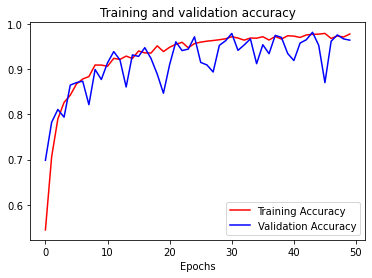

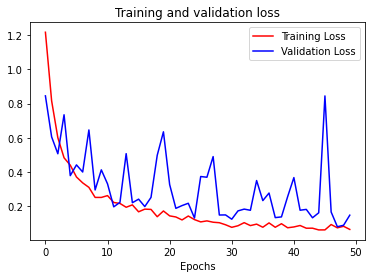

In [29]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epochs')
plt.legend()
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel('Epochs')
plt.legend()
plt.title('Training and validation loss')

In [31]:
model.save('trained_model.h5')

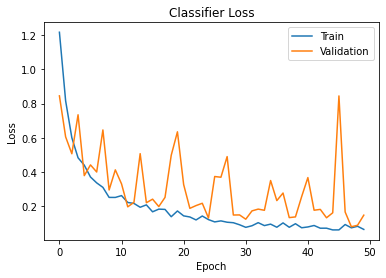

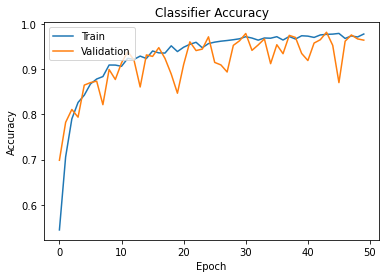

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
labels = train_generator.class_indices
print(labels)

{'Tomato_Bacterial_spot': 0, 'Tomato_Early_blight': 1, 'Tomato_Late_blight': 2, 'Tomato_Leaf_Mold': 3, 'Tomato_Yellow_Leaf_Curl_Virus': 4, 'Tomato_healthy': 5}


In [1]:
import numpy as np
from sklearn import metrics

x, y = validation_generator.next()
prediction = model.predict(x)

predict_label1 = np.argmax(prediction, axis=-1)
true_label1 = np.argmax(y, axis=-1)

y = np.array(true_label1)

scores = np.array(predict_label1)
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

NameError: name 'validation_generator' is not defined